# Introduction
Le but premier de ce document est de présenter l'importances des variables (features) du jeux de données d'apprentissage (dataset d'apprentissage) ainsi que les performances en rapport avec 3 algorithme de machine learning.<br>
Les 3 algorithmes comparés sont:
* random forest
* XGBOOST
* Gradient boosting

A l'heure actuelle, c'est l'algorithme de XGBOOST qui est utilisé.<br>
l'importance des variables est mesuré à l'aide d'un échantillon d'apprentisage ayant 13000 cas négatifs et 2058 cas positifs. Les performances sont mesurées sur un échantillon de test ayant 15927 cas négatifs et 686 cas positifs.

# $F_{1}$ score et $F_{\beta}$ score

$\begin{eqnarray*}
precision&=&\frac{tp}{tp+fp}\\
recal&=&\frac{tp}{tp+fn}\\
F_{1}&=&2 \frac{precision\times recal}{precision+recal}\\
F_{\beta}&=&(1+\beta^{2})\frac{precision\times recal}{\beta^{2}precision+recal}\\
\end{eqnarray*}$<br>
$\beta$ is chosen such that recall is considered $\beta$ times as important as precision

# Random Forest


In [59]:
X_train_tot = X_train_tot.fillna(value=0)
X_test_tot = X_test_tot.fillna(value=0)
#X_res_train = pd.DataFrame(X_res_train).fillna(value=0)


from sklearn.ensemble import RandomForestClassifier
#entropy
rdf = RandomForestClassifier(n_estimators=440,criterion='entropy',max_depth=20, max_features=0.45,\
                             min_samples_split=3,random_state=2018)
#rdf.fit(X_train_tot,Y_train_target)
rdf.fit(X_train_tot, Y_train_target)
#rdf.fit(X_res_train, y_res_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features=0.45, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=440, n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

Les features les plus importants de random forest sont:

* 'dc_statutnir_id_nan',
* 'dc_statutnir_id_4.0',
* 'etab_banc_type_group1', 
* 'catmail_mail_etrange', 
* 'sum_j_periode',
* 'delai_fct_rad', 
* 'etab_banc_type_nan', 
* 'dn_nbjourscarenceiccp',
* 'dc_romev3_1_id_Z', 
* 'sum_j_ca', 'top_abs_das',
* 'duree_vie_mois_etab_cess', 
* 'catmail_mail_majoritaire',
* 'dn_mtsjriplafonnedrtretenu', 
* 'delai_m_saisieae_fct'

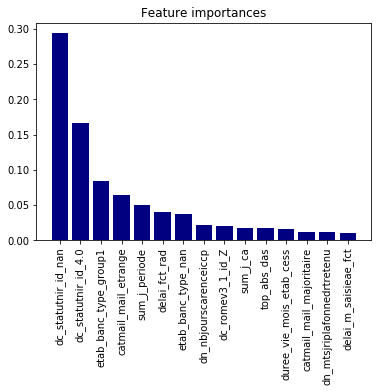

### Les performances de la Random forest sont:
* f1_score:0.9354120267260579,
* precision_score: 0.9531013615733737, 
* recall_score: 0.9183673469387755, 
* roc_auc_score:0.9965921869110909, 
* average_precision_score:0.9723015200969064

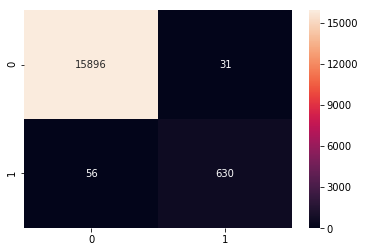

In [82]:
import seaborn as sns
sns.heatmap(cm, fmt='d', annot=True)

# XGBOOST

In [66]:
from xgboost import XGBClassifier
from xgboost import plot_importance
#aucpr
model = XGBClassifier(base_score=0.001, silent=True, scale_pos_weight=1, 
    colsample_bytree=0.4, subsample=0.8,
    random_state=42, learning_rate=0.005, 
    objective='binary:logistic', n_estimators=1000,
    max_depth=4, verbose=True,
    gamma=10)
model.fit(X_train_tot, Y_train_target, eval_metric='aucpr')
#model.fit(X_res_train, y_res_train, eval_metric='aucpr')

C:\Users\IFDU1270\Desktop\newwin\WPy-3710\python-3.7.1.amd64\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\IFDU1270\Desktop\newwin\WPy-3710\python-3.7.1.amd64\lib\site-packages\fastparquet\dataframe.py:4: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


XGBClassifier(base_score=0.001, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=10, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.005, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, silent=True, subsample=0.8,
       tree_method=None, validate_parameters=False, verbose=True,
       verbosity=None)

### Les features les plus importants sont:
  
* 'sum_j_periode',
* 'dc_statutnir_id_nan',
* 'dn_mtsjriplafonnedrtretenu',
* 'dc_romev3_1_id_Z',
* 'dn_nbjourscarenceiccp',
* 'dc_statutnir_id_4.0',
* 'etab_banc_type_group1',
* 'duree_emploi',
* 'etab_banc_type_nan',
* 'delai_fct_rad',
* 'delai_m_saisieae_fct',
* 'sum_j_ca',
* 'dn_mtislr',
* 'catmail_mail_etrange',
* 'dn_horairehebdosalairie'

### Features importance

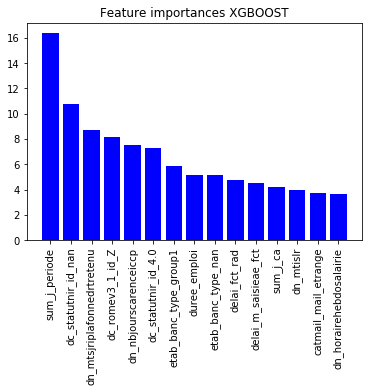

#### Les performances de XGBOOST sont:
* f1_score:0.9114658925979681
* precision_score:0.9075144508670521 
* recall_score: 0.9154518950437318, 
* roc_auc_score:0.996648063202355 
* average_precision_score:0.9704877958636464

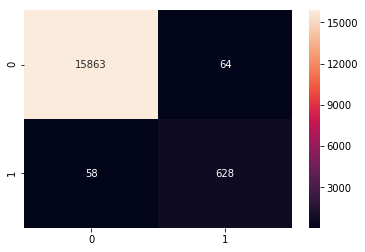

In [80]:
import seaborn as sns
sns.heatmap(cm, fmt='d', annot=True)

# Grandiant boosting 

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
#min_samples_split=3
gbt = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1000,max_depth=4, max_features=0.4,\
                                 min_samples_split=4,random_state=2018,subsample=0.8)
#gbt.fit(X_train_tot,Y_train_target)
gbt.fit(X_train_tot, Y_train_target)
#gbt.fit(X_res_train, y_res_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.005, loss='deviance', max_depth=4,
              max_features=0.4, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=2018,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### Les features les plus importants sont:
* 'dc_statutnir_id_nan', 
* 'dc_statutnir_id_4.0',
* 'etab_banc_type_group1', 
* 'catmail_mail_etrange',
* 'etab_banc_type_nan', 
* 'catmail_mail_majoritaire', 
* 'sum_j_periode',
* 'dc_romev3_1_id_Z', 
* 'delai_fct_rad', 
* 'dn_nbjourscarenceiccp',
* 'top_abs_das', 
* 'duree_vie_mois_etab_cess', 
* 'sum_j_ca',
* 'delaifct_lj', 
* 'dn_mtsjriplafonnedrtretenu'

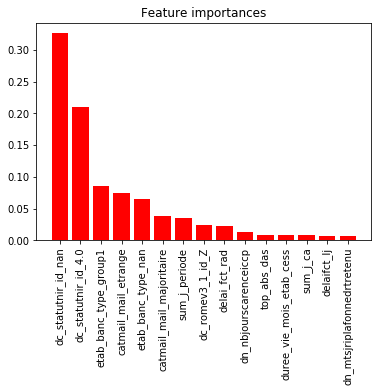

#### Les performances de Gradient boosting sont:
* f1_score:0.9243323442136498
* precision_score:0.9410876132930514 
* recall_score: 0.9081632653061225, 
* roc_auc_score: 0.9960860968987332
* average_precision_score:0.9663544416219536

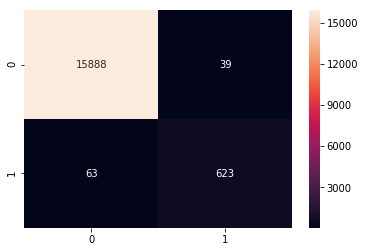

In [78]:
import seaborn as sns
sns.heatmap(cm, fmt='d', annot=True)